In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\BIJAY\Downloads\Customer-Churn-Records.csv")   # read data
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


## About Dataset

- `RowNumber`—corresponds to the record (row) number and has no effect on the output.
- `CustomerId` —contains random values and has no effect on customer leaving the bank.
- `Surname` —the surname of a customer has no impact on their decision to leave the bank.
- `CreditScore` —can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- `Geography` —a customer’s location can affect their decision to leave the bank.
- `Gender` —it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- `Age` —this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- `Tenure` —refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- `Balance` —also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- `NumOfProducts` —refers to the number of products that a customer has purchased through the bank.
- `HasCrCard` —denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- `IsActiveMember` —active customers are less likely to leave the bank.
- `EstimatedSalary` —as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- `Complain` —customer has complaint or not.
- `Satisfaction Score` —Score provided by the customer for their complaint resolution.
- `Card Type` —type of card hold by the customer.
- `Points Earned` —the points earned by the customer for using credit card.
- `Exited` —whether or not the customer left the bank. (`Target feature`)

## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [4]:
df.duplicated().sum()

0

In [5]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [6]:
# Churn rate by gender
churn_rate_gender = df.groupby('Gender')['Exited'].mean()
print(churn_rate_gender)

Gender
Female    0.250715
Male      0.164743
Name: Exited, dtype: float64


In [7]:
# Churn rate by geography
churn_rate_geo = df.groupby('Geography')['Exited'].mean()
print(churn_rate_geo)

Geography
France     0.161747
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64


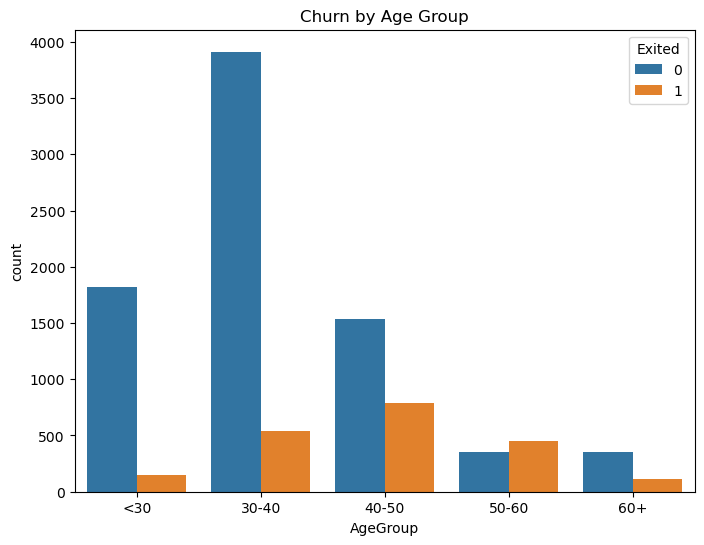

In [8]:
# Churn by age group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, np.inf], labels=['<30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize=(8, 6))
sns.countplot(x='AgeGroup', hue='Exited', data=df)
plt.title('Churn by Age Group')
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
categorical_features = ["Gender", "Geography"]

# Create an empty dictionary to store label encoders for each feature
label_encoders = {}

# Iterate over each categorical feature and label encode its values
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    df[feature + '_encoded'] = label_encoders[feature].fit_transform(df[feature])

# Drop the original categorical features if you don't need them anymore
df.drop(categorical_features, axis=1, inplace=True)

df = df.rename(columns={'Gender_encoded':'Gender','Geography_encoded':'Geography'})

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup,Gender,Geography
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,40-50,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,40-50,0,2
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,40-50,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,30-40,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,40-50,0,2


In [11]:
df.drop(columns=['RowNumber','CustomerId','Surname','Satisfaction Score','Point Earned','Card Type','AgeGroup'],inplace=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Gender,Geography
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,2
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,2


In [12]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Gender,Geography
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,0.545700,0.746300
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,0.497932,0.827529
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,1.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,2.000000


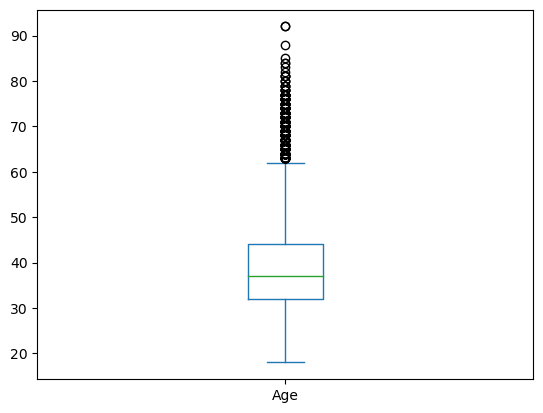

In [125]:
df['Age'].plot(kind='box')
plt.show()

In [126]:
df[df['Age']>90]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Gender,Geography
6443,753,92,3,121513.31,1,0,1,195563.99,0,0,1,0
6759,705,92,1,126076.24,2,1,1,34436.83,0,0,1,0


In [127]:
rows_to_remove = [6443,6759]
df = df.drop(rows_to_remove)

In [128]:
df.shape

(9998, 12)

In [13]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Gender,Geography
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.002857,0.007888
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.027544,0.022812
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.014733,0.003739
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,0.012087,0.069408
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.021859,0.003972
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,0.005766,-0.008523
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.022544,0.006724
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.008112,-0.001369
Exited,-0.026771,0.285296,-0.013656,0.118577,-0.047611,-0.006976,-0.156356,0.012490,1.000000,0.995693,-0.106267,0.035712
Complain,-0.027048,0.283530,-0.013047,0.119124,-0.046357,-0.007095,-0.154741,0.012494,0.995693,1.000000,-0.106287,0.035830


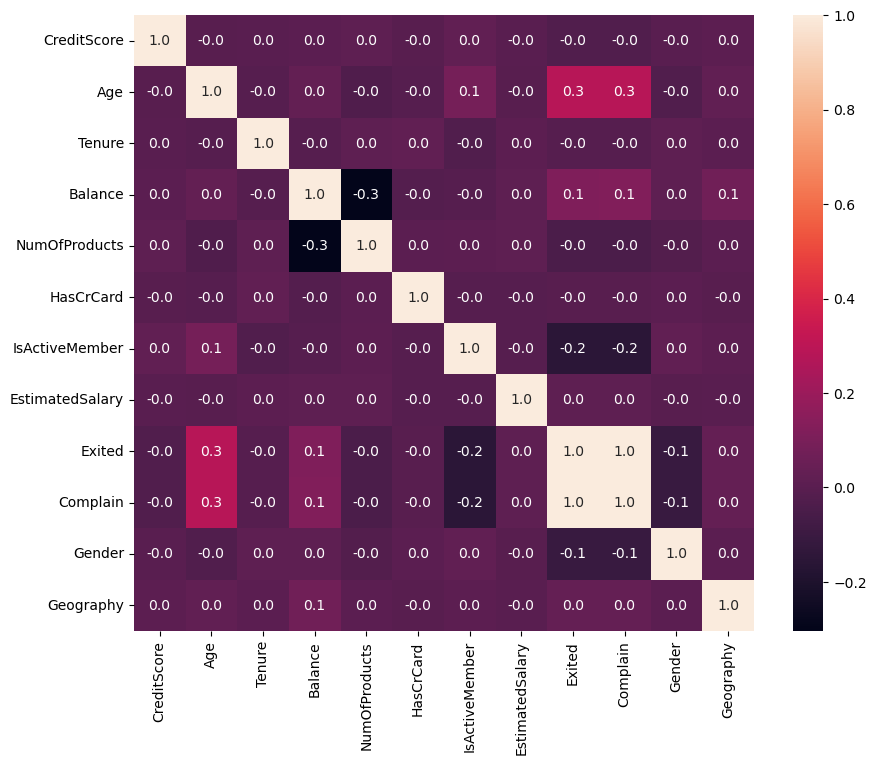

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

The correlation between `Complain` feature and target variable `Exited` is 1 so this feature is so redundant to the dataset. Removing this feature will lead us to a better generalize model.

Exited
0    7962
1    2038
Name: count, dtype: int64


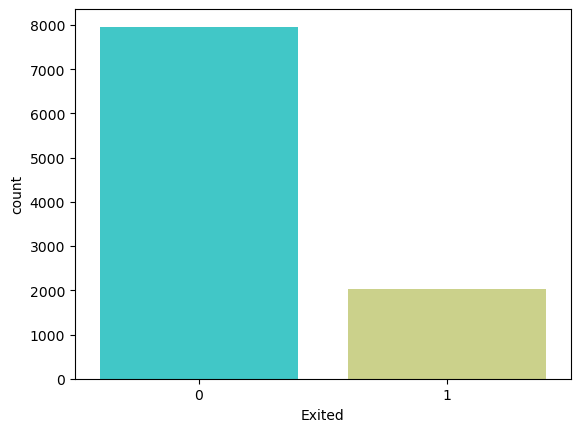

In [15]:
print(df['Exited'].value_counts())
sns.countplot(data=df,x='Exited',palette='rainbow')
plt.show()

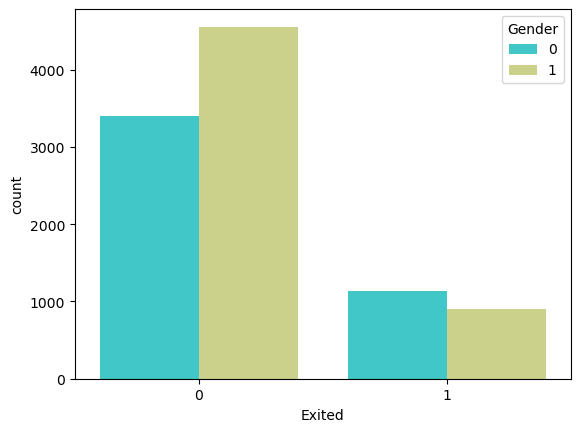

In [16]:
sns.countplot(x='Exited',hue='Gender',data=df,palette='rainbow')
plt.show()

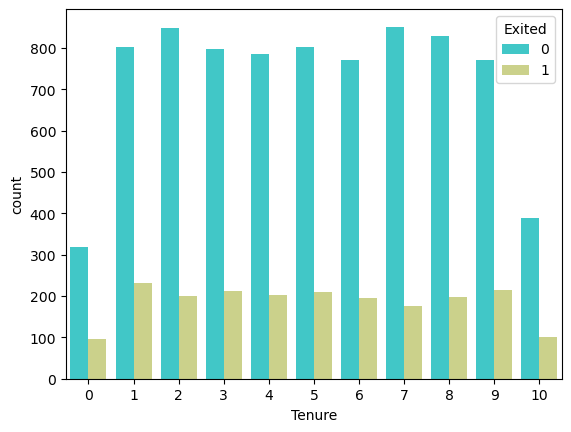

In [17]:
sns.countplot(x='Tenure',hue='Exited',data=df,palette='rainbow')
plt.show()

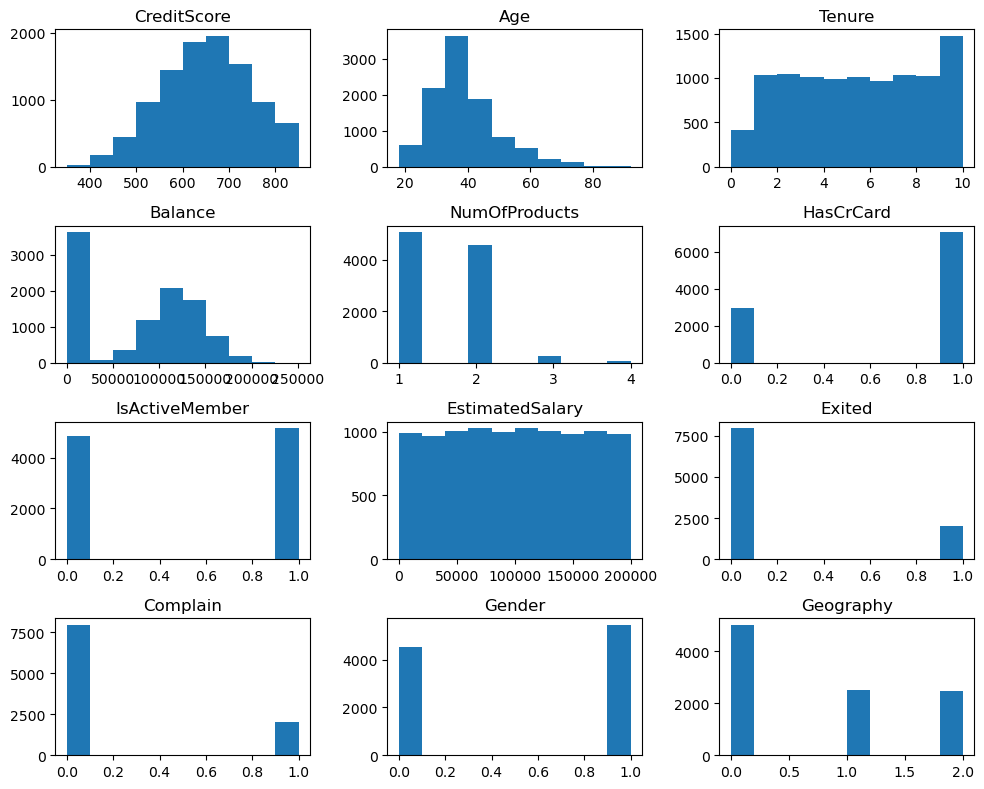

In [18]:
df.hist(figsize=(10, 8),grid=False)  # Adjust the figsize as needed
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

## Handling imbalanced data with SMOTE algorithm

In [54]:
X = df.drop(columns=['Exited', 'Complain'])
y = df['Exited']

In [55]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Gender,Geography
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,2
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,2


In [56]:
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


In [57]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender,Geography
0,619,42,2,0.00,1,1,1,101348.88,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2
2,502,42,8,159660.80,3,1,0,113931.57,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2


In [58]:
from imblearn.over_sampling import RandomOverSampler
sm = RandomOverSampler(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

In [59]:
print(X_resampled.shape)
print(y_resampled.shape)

(15924, 10)
(15924,)


In [60]:
y_resampled.value_counts()

Exited
1    7962
0    7962
Name: count, dtype: int64

## Model training and accuracy

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
X_train,X_test ,y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### SVM with RBF kernel

In [63]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_scaled,y_train)

SVC()

In [64]:
y_pred =svc.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test,y_pred)
svm_f1 = f1_score(y_test,y_pred)
svm_roc_auc_score = roc_auc_score(y_test,y_pred)
print('Accuracy:',svm_accuracy)
print('f1 score:', svm_f1)
print('ROC AUC score', svm_roc_auc_score)

Accuracy: 0.7987441130298273
f1 score: 0.795794839120739
ROC AUC score 0.7992921598620251


In [65]:
con_mat = confusion_matrix(y_test,y_pred)
print(con_mat)

[[1295  356]
 [ 285 1249]]


### Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(oob_score=True)
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(oob_score=True)

In [67]:
y_pred =rf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test,y_pred)
rf_f1 = f1_score(y_test,y_pred)
print('Accuracy:', rf_accuracy)
print('f1 score:', rf_f1)

Accuracy: 0.9444270015698587
f1 score: 0.9440050616893387


In [74]:
rf_roc_auc_score = roc_auc_score(y_test,y_pred)
print('ROC AUC score', rf_roc_auc_score)

ROC AUC score 0.945425987331766


In [68]:
con_mat = confusion_matrix(y_test,y_pred)
print(con_mat)

[[1516  135]
 [  42 1492]]


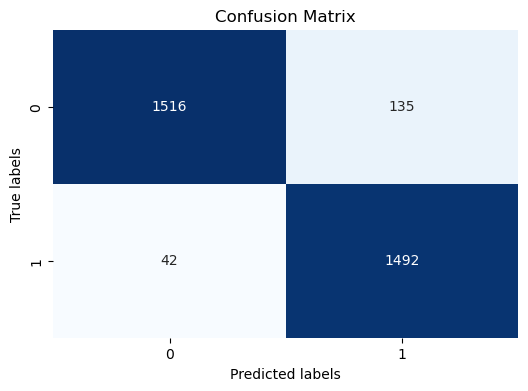

In [69]:
# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [70]:
rf.oob_score_

0.9496820786560954

In [71]:
rf.feature_importances_

array([0.13525428, 0.25866363, 0.08081511, 0.14164453, 0.13000286,
       0.01902974, 0.03643865, 0.1394458 , 0.02003072, 0.03867467])

In [72]:
feature_imp = pd.Series(rf.feature_importances_, index=X.columns[0:10]).sort_values(ascending=False)
feature_imp

Age                0.258664
Balance            0.141645
EstimatedSalary    0.139446
CreditScore        0.135254
NumOfProducts      0.130003
Tenure             0.080815
Geography          0.038675
IsActiveMember     0.036439
Gender             0.020031
HasCrCard          0.019030
dtype: float64

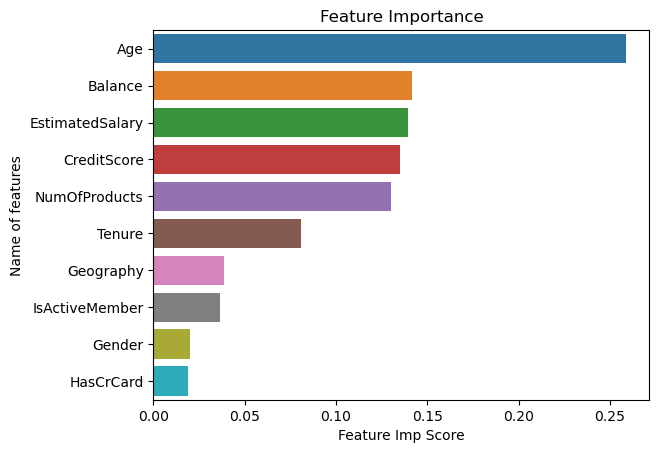

In [73]:
sns.barplot(x=feature_imp,y=feature_imp.index, palette='tab10')
plt.title('Feature Importance')
plt.xlabel('Feature Imp Score')
plt.ylabel('Name of features')
plt.show()

### XGBoost classifier

In [75]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [76]:
y_pred = xgb.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test,y_pred)
xgb_f1 = f1_score(y_test,y_pred)
print('Accuracy:', xgb_accuracy)
print('f1 score:', xgb_f1)

Accuracy: 0.7353218210361068
f1 score: 0.7343208320201702


In [77]:
con_mat = confusion_matrix(y_test,y_pred)
print(con_mat)

[[1177  474]
 [ 369 1165]]


### ANN model

In [78]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.optimizers import Adam

In [79]:
model = Sequential()

model.add(Dense(20,activation='relu',input_dim=10))    # hidden layer
model.add(Dense(10,activation='relu'))                 # hidden layer
model.add(Dense(5,activation='relu'))                  # hidden layer
model.add(Dense(1,activation='sigmoid'))               # output layer

In [80]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 491 (1.92 KB)

 Trainable params: 491 (1.92 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [82]:
history = model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5270 - loss: 0.7277 - val_accuracy: 0.6641 - val_loss: 0.6280
Epoch 2/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6881 - loss: 0.6070 - val_accuracy: 0.7335 - val_loss: 0.5706
Epoch 3/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7396 - loss: 0.5593 - val_accuracy: 0.7441 - val_loss: 0.5444
Epoch 4/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7563 - loss: 0.5314 - val_accuracy: 0.7469 - val_loss: 0.5277
Epoch 5/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7645 - loss: 0.5114 - val_accuracy: 0.7551 - val_loss: 0.5143
Epoch 6/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7655 - loss: 0.5026 - val_accuracy: 0.7586 - val_loss: 0.5034
Epoch 7/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7709 - loss: 0.4907 - val_accuracy: 0.7681 - val_loss: 0.4933
Epoch 8/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7826 - loss: 0.4744 - val_accuracy: 0.

In [83]:
test_loss, ann_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
print('\nTest accuracy:', ann_accuracy)

100/100 - 0s - 4ms/step - accuracy: 0.7972 - loss: 0.4425

Test accuracy: 0.7971742749214172


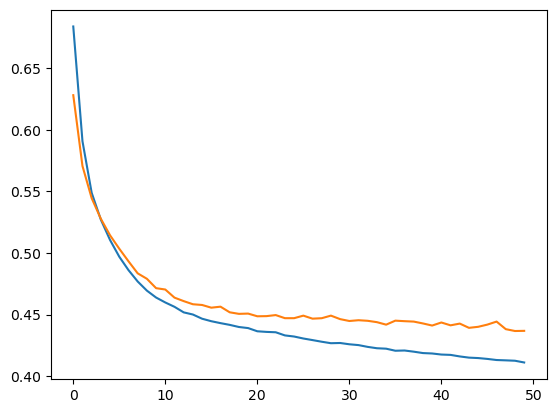

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

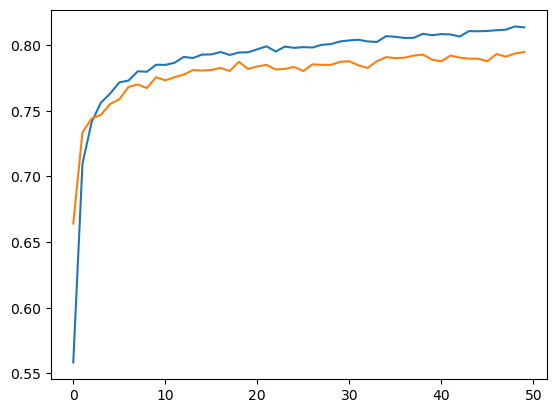

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

## Model comparision

In [86]:
# for test data
model_accuracies = {
    'Random Forest': rf_accuracy,
    'XGBoost': xgb_accuracy,
    'SVM': svm_accuracy,
    'ANN': ann_accuracy
}

model_f1_scores = {
    'Random Forest': rf_f1,
    'XGBoost': xgb_f1,
    'SVM': svm_f1,
    'ANN': 'None'
}

# Convert dictionaries to DataFrames
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model Name', 'Accuracy'])
f1_df = pd.DataFrame(list(model_f1_scores.items()), columns=['Model Name', 'F1 Score'])

# Merge DataFrames on 'Model Name'
model_performance_df = pd.merge(accuracy_df, f1_df, on='Model Name')

# Sort DataFrame by Accuracy column
model_performance_df = model_performance_df.sort_values(by='Accuracy', ascending=False)
model_performance_df

,Model Name,Accuracy,F1 Score
0,Random Forest,0.944427,0.944005
2,SVM,0.798744,0.795795
3,ANN,0.797174,None
1,XGBoost,0.735322,0.734321


- Since `Random Forest` model has the highest accuracy and f1 score, will perform hyperparameter tuning with this to achieve best model performance.
- The final optimized model will further use for model deployment

## Hyperparameter tuning using RandomizedSearchCV

In [93]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50,200,400,600],  # Number of trees in the forest
    'max_depth': [None, 2, 10],      # Maximum depth of the trees
    'min_samples_split': [2, 3, 5],      # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],        # Minimum number of samples required at each leaf node
    'max_samples': [0.5, 0.75, 1]            # maximum samples
}

# Instantiate RandomizedSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Perform the random search
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(oob_score=True), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 10],
                         'max_samples': [0.5, 0.75, 1],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [50, 200, 400, 600]},
             verbose=2)

In [94]:
# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Evaluate the best model
accuracy = best_rf.score(X_test_scaled, y_test)
print("Test Accuracy:", accuracy)

Best Parameters: {'max_depth': None, 'max_samples': 0.75, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 600}
Test Accuracy: 0.9365777080062795


In [95]:
y_pred = best_rf.predict(X_test_scaled)
con_mat = confusion_matrix(y_test,y_pred)
print(con_mat)

[[1494  157]
 [  45 1489]]


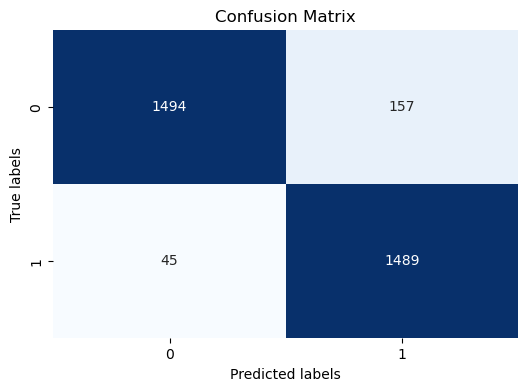

In [96]:
# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Pickling the model for deployment

In [100]:
from pickle4 import pickle
pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))